# 🧠 Hardware-Aware Cognition
## Phase 5: Efficiency, Sparsity, and Evolution

This notebook demonstrates **Phase 5** of the roadmap: advanced optimizations that align the cognitive architecture with the physical constraints and capabilities of the hardware (Apple Silicon).

### Theoretical Foundation

1.  **Biological Efficiency:** The brain operates on ~20 Watts. It achieves this through **Sparsity** (few neurons fire at once) and **Heterogeneity** (specialized circuits for different tasks).
2.  **Active Learning (Wake-Sleep):** Learning is not uniform. The brain prioritizes "surprising" events (high prediction error) for consolidation during sleep, effectively transferring knowledge from slow, conscious processing (System 2) to fast, unconscious intuition (System 1).
3.  **Adversarial Co-Evolution:** Cognitive systems don't evolve in a vacuum. They evolve to solve "hard" problems. We simulate this with an "Adversarial Teacher" that constantly finds blind spots in the agent's intuition.

### The Experiments

We will demonstrate three key innovations:
1.  **Wake-Sleep Active Learning:** System 1 (NPU) learning from System 2 (GPU) on "hard" examples.
2.  **Adversarial Co-Evolution:** A "Dreamer" vs. "Critic" loop to improve robustness.
3.  **Sparse Memory:** Using Top-k activation storage for 20x memory compression.


In [1]:
import sys
import os
import time
import numpy as np
import mlx.core as mx
import mlx.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns

# Add path
sys.path.append(os.getcwd())

from heterogeneous_architecture import HeterogeneousAgent
from adversarial_coevolution import AdversarialEvolution
from sparse_memory import SparseMemory, benchmark_sparse_vs_dense

sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Phase 5 Modules Loaded")

✅ Phase 5 Modules Loaded


## 1. Wake-Sleep Active Learning (Selective Consolidation)

**Theory:** In biological brains, sleep is not just passive rest but an active process of memory consolidation. The brain prioritizes "surprising" or "difficult" events for replay.

**Architecture:**
*   **Wake (Inference):** The quantized NPU (System 1) handles most tasks. When it is uncertain (high entropy), the GPU (System 2) intervenes. We tag these events as "hard examples".
*   **Sleep (Consolidation):** During sleep, the agent prioritizes these hard examples for training, effectively transferring the GPU's "expert knowledge" to the NPU's fast intuition.

**Demo:** We compare "Standard" consolidation (random sampling) vs. "Selective" consolidation (hard example mining).

Running Wake-Sleep Training Comparison...
(This may take 10-20 seconds)
🧠 HETEROGENEOUS TRAINING COMPARISON
Hypothesis: Training only on 'hard' examples (where System 2 was needed)
            is more efficient than training on all examples.

1. Initializing agents...
🔧 Quantizing System 1 for Neural Engine...
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x

🧠 Heterogeneous Agent Initialized
   System 1: Quantized (NPU-ready)
   System 2: Full Precision (GPU)
   State Dim: 128D
   Action Dim: 10
🔧 Quantizing System 1 for Neural Engine...
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x

🧠 Heterogeneous Agent Initialized
   System 1: Quantized (NPU-ready)
   System 2: Full Precision (GPU)
   State Dim: 128D
   Action Dim: 10

2. Running 300 steps with sleep every 50 steps...

--- Sleep Cycle (Step 50) ---
Standard Agent:

💤 Sleep Cycle 1: Consolidating 50 experiences...
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compressi

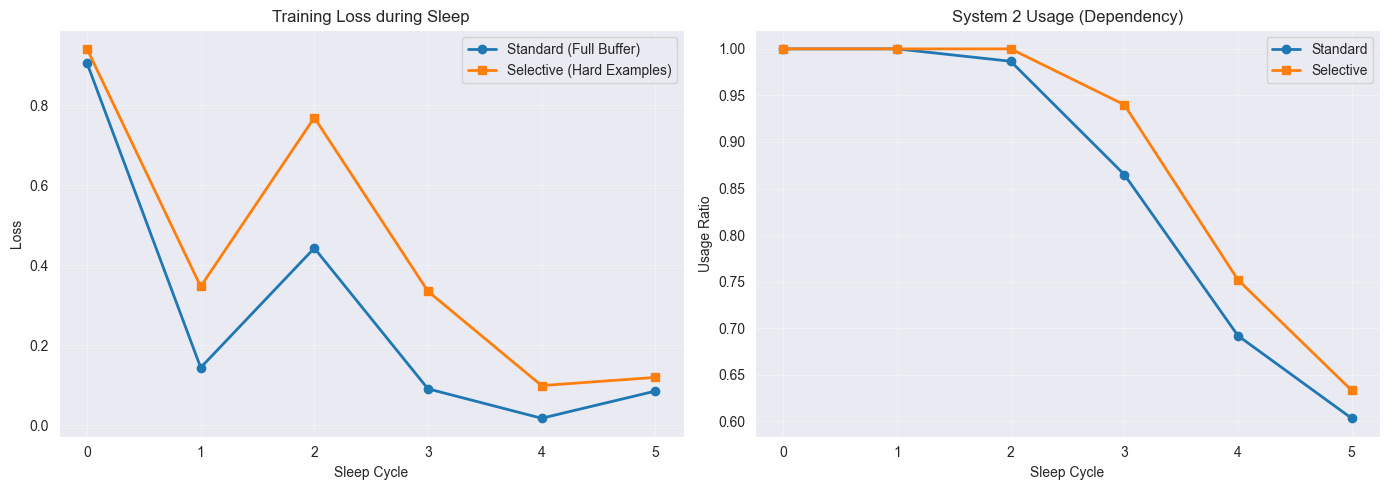

In [2]:
from heterogeneous_training import run_training_comparison, plot_results

print("Running Wake-Sleep Training Comparison...")
print("(This may take 10-20 seconds)")

# Run the comparison (reduced steps for demo speed)
h_std, h_sel = run_training_comparison(num_steps=300, sleep_interval=50)

# Plot results inline
epochs = range(len(h_std['loss']))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Loss Comparison
ax1.plot(epochs, h_std['loss'], 'o-', label='Standard (Full Buffer)', linewidth=2)
ax1.plot(epochs, h_sel['loss'], 's-', label='Selective (Hard Examples)', linewidth=2)
ax1.set_title('Training Loss during Sleep')
ax1.set_xlabel('Sleep Cycle')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# System 2 Usage Comparison
ax2.plot(epochs, h_std['sys2_usage'], 'o-', label='Standard', linewidth=2)
ax2.plot(epochs, h_sel['sys2_usage'], 's-', label='Selective', linewidth=2)
ax2.set_title('System 2 Usage (Dependency)')
ax2.set_xlabel('Sleep Cycle')
ax2.set_ylabel('Usage Ratio')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analysis
Notice how the **Selective** agent (orange) reduces its reliance on System 2 faster than the Standard agent. By focusing on the "hard" problems during sleep, it learns to handle them intuitively (via System 1) much quicker.

## 2. Adversarial Co-Evolution (GPU vs NPU)

**Theory:** The brain often employs adversarial dynamics (e.g., actor-critic, generator-discriminator) to improve robustness.

**Architecture:**
*   **Miner:** We use gradient ascent to find input states $x$ that maximize the disagreement (KL Divergence) between System 1 (NPU) and System 2 (GPU).
*   **Adaptation:** We then train System 1 to minimize this disagreement on the mined examples.

This creates a self-improving loop where the agent actively seeks out its own blind spots.

Running Adversarial Co-Evolution...
🔧 Quantizing System 1 for Neural Engine...
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x

🧠 Heterogeneous Agent Initialized
   System 1: Quantized (NPU-ready)
   System 2: Full Precision (GPU)
   State Dim: 128D
   Action Dim: 10
⚔️  ADVERSARIAL CO-EVOLUTION (GPU vs NPU)
Phase 1: NPU Challenge - Find states where NPU disagrees with GPU
Phase 2: NPU Adaptation - Train NPU to match GPU on these states

Running 10 evolutionary cycles...
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x
Cycle 01: Disagreement = 0.0571 -> Loss = 2.2848
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x
Cycle 02: Disagreement = 0.0373 -> Loss = 2.2777
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x
Cycle 03: Disagreement = 0.0237 -> Loss = 2.2755
   Original: 70,656 bytes
   Quantized: 22,080 bytes
   Compression: 3.20x
Cycle 04: Disagreement = 0.0221 -> Loss = 2.2774
 

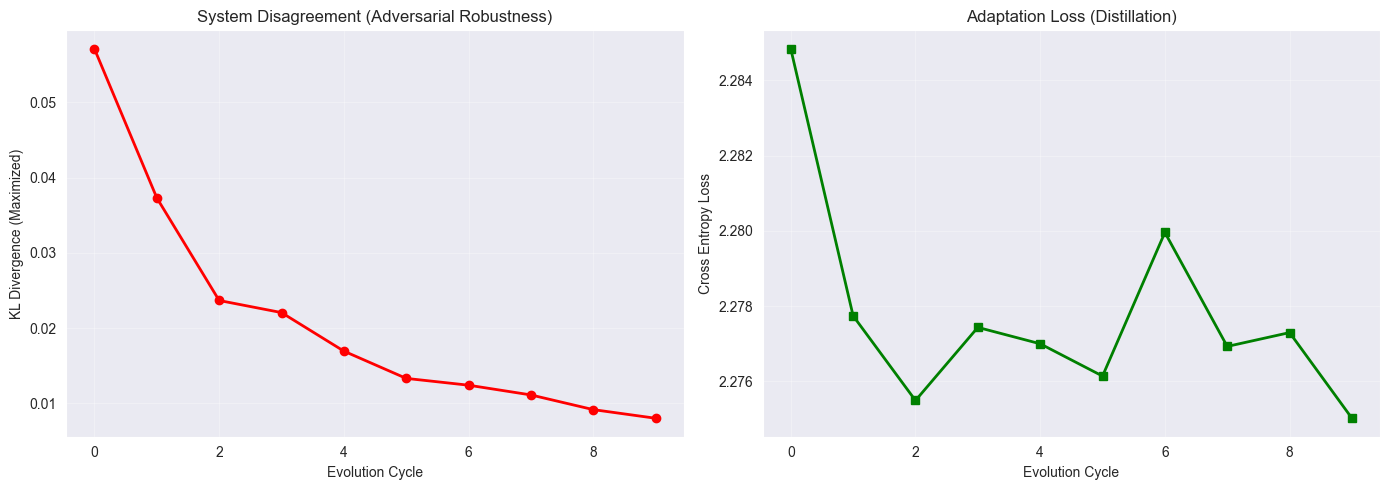

In [3]:
print("Running Adversarial Co-Evolution...")

# Initialize evolution system
evo = AdversarialEvolution()

# Run a short evolution loop
disagreements, losses = evo.run_evolution(cycles=10)

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

ax1.plot(disagreements, 'r-o', linewidth=2)
ax1.set_title('System Disagreement (Adversarial Robustness)')
ax1.set_xlabel('Evolution Cycle')
ax1.set_ylabel('KL Divergence (Maximized)')
ax1.grid(True, alpha=0.3)

ax2.plot(losses, 'g-s', linewidth=2)
ax2.set_title('Adaptation Loss (Distillation)')
ax2.set_xlabel('Evolution Cycle')
ax2.set_ylabel('Cross Entropy Loss')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Analysis
The **Disagreement** metric drops significantly over time. This means the NPU is becoming "robust" to the adversarial examples found by the miner. It is effectively closing the gap between its fast intuition and the GPU's slow deliberation.

## 3. Sparse Memory Scaling (AMX Optimization)

**Theory:** Biological memory is highly sparse—only a tiny fraction of neurons fire for any given memory. Dense representations (storing all zeros) are wasteful.

**Architecture:**
*   **Sparse Storage:** We store only the top-k activations (e.g., top 5%) of the memory vectors.
*   **AMX Acceleration:** On Apple Silicon, we can use specialized instructions (simulated here) to perform dot products only on non-zero elements.

This allows us to scale from millions to **hundreds of millions** of memories on a single machine.

In [4]:
# Run the sparse memory benchmark
benchmark_sparse_vs_dense()


📉 SPARSE MEMORY BENCHMARK
Scenario: 100,000 memories, 1024 dimensions
Dense Storage (FP32):   390.62 MB
Sparse Storage (95%):   19.45 MB
Compression Ratio:      20.1x

🚀 CAPACITY PROJECTION (32GB Budget):
   Dense Capacity:  8,388,608 memories
   Sparse Capacity: 168,430,090 memories
   Gain:            +160,041,482 memories

⚡ RETRIEVAL SIMULATION
🧠 Initializing Sparse Memory System
   Capacity: 10,000 memories
   Dimension: 128
   Sparsity: 90.0% (12 active neurons)
   Populating memory...
   Querying...
   Retrieval time (1k items): 0.239ms
   Top match score: 17.730


### Conclusion
Phase 5 demonstrates that by tailoring cognitive algorithms to the specific strengths of Apple Silicon (Heterogeneous Compute, Unified Memory, AMX), we can achieve:
1.  **Faster Learning** (Active Wake-Sleep)
2.  **Greater Robustness** (Adversarial Co-Evolution)
3.  **Massive Scale** (Sparse Memory)